In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display 

In [ ]:
##############################################################
# Analysis of Neighborhoods data 
##############################################################

In [2]:
# Reading census data 
df = pd.read_csv("Revised Sub-Neighborhoods.csv")

# Selecting neighborhoods and proportions
new_df_n = df[['Neighborhood','White Proportion','Black Proportion']]

# Selecting sub- neighborhoods and proportions
new_df_sn = df[['Primary Sub-Neighborhood','White Proportion','Black Proportion']]

# Removing the % signs 
new_df_n['White Proportion'] = list(map(lambda x: x[:-1], new_df_n['White Proportion'].values))
new_df_n['Black Proportion'] = list(map(lambda x: x[:-1], new_df_n['Black Proportion'].values))
new_df_sn['White Proportion'] = list(map(lambda x: x[:-1], new_df_sn['White Proportion'].values))
new_df_sn['Black Proportion'] = list(map(lambda x: x[:-1], new_df_sn['Black Proportion'].values))

# Casting them as float
new_df_n['White Proportion'] = new_df_n['White Proportion'].astype(float)
new_df_n['Black Proportion'] = new_df_n['Black Proportion'].astype(float)
new_df_sn['White Proportion'] = new_df_sn['White Proportion'].astype(float)
new_df_sn['Black Proportion'] = new_df_sn['Black Proportion'].astype(float)

new_df_sn.dropna()

print(new_df_n)
new_df_n.info()

print(new_df_sn)
new_df_sn.info()

      Neighborhood  White Proportion  Black Proportion
0         Brighton             62.27              5.84
1         Brighton             79.28              5.94
2         Brighton             70.95              6.16
3         Brighton             74.78              7.33
4         Brighton             67.63             10.35
..             ...               ...               ...
175       Back Bay              0.00              0.00
176    East Boston              0.00              0.00
177    East Boston              0.00              0.00
178    Beacon Hill              0.00              0.00
179  Jamaica Plain             65.38             34.62

[180 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Neighborhood      180 non-null    object 
 1   White Proportion  180 non-null    float64
 2   Black Proportion  1

Total # of Black Americans in area = 195,752 

Total # of White Americans in area = 389,001 

Total # of other races in area = 79,921 

Total # in area = 664,674 



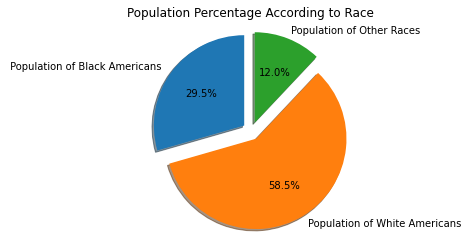

In [3]:
print("Total # of Black Americans in area = 195,752 \n")
print("Total # of White Americans in area = 389,001 \n")
print("Total # of other races in area = 79,921 \n")
print("Total # in area = 664,674 \n") 

# df.pivot_table(index=['Primary Sub-Neighborhood'], aggfunc='size')

import matplotlib.pyplot as plt
# Pie chart
labels = ' Population of Black Americans ', 'Population of White Americans', 'Population of Other Races'
sizes = [(195752/664674),(389001/664674),(79921/664674)]
# only "explode" the 2nd slice 
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
plt.title("Population Percentage According to Race")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
# Predominant white neighborhoods
w_n = new_df_n.groupby('Neighborhood', axis= 0)['White Proportion'].mean()
w_n = w_n.to_frame()
b_n = new_df_n.groupby('Neighborhood', axis= 0)['Black Proportion'].mean()
b_n = b_n.to_frame()
c = w_n[w_n['White Proportion'] > b_n['Black Proportion']]
print(c.count())
w_neighborhoods = c.index.tolist()
w_neighborhoods

White Proportion    19
dtype: int64


['Allston',
 'Back Bay',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Downtown',
 'East Boston',
 'Fenway',
 'Harbor Islands',
 'Jamaica Plain',
 'Longwood Medical Area',
 'Mission Hill',
 'North End',
 'Roslindale',
 'South Boston',
 'South Boston Waterfront',
 'South End',
 'West End',
 'West Roxbury']

In [14]:
# Predominant Black neighborhoods
b_n[b_n['Black Proportion']> w_n['White Proportion']]
b_n[b_n['Black Proportion']> w_n['White Proportion']].count()
d = b_n[b_n['Black Proportion']> w_n['White Proportion']]
print(d.count())
b_neighborhoods = d.index.tolist()
b_neighborhoods

Black Proportion    4
dtype: int64


['Dorchester', 'Hyde Park', 'Mattapan', 'Roxbury']

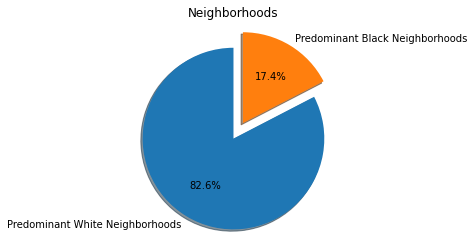

In [7]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'Predominant White Neighborhoods', 'Predominant Black Neighborhoods'
sizes = [(19/23),(4/23)]
# only "explode" the 2nd slice 
explode = (0.1, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
plt.title("Neighborhoods")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [11]:
# Predominant white sub-neighborhoods
w_sn = new_df_sn.groupby('Primary Sub-Neighborhood', axis= 0)['White Proportion'].mean()
w_sn = w_sn.to_frame()
b_sn = new_df_sn.groupby('Primary Sub-Neighborhood', axis= 0)['Black Proportion'].mean()
b_sn = b_sn.to_frame()
a = w_sn[w_sn['White Proportion']>b_sn['Black Proportion']]
print(a.count())
# List of predomoinant white sub-neighborhoods
w_subneighborhoods = a.index.tolist()
w_subneighborhoods

White Proportion    61
dtype: int64


['Aberdeen',
 'Adams Village',
 'Allston',
 'Ashcroft',
 'Ashmount',
 'Back Bay',
 'Back Bay West / Back Bay',
 'Bay Village',
 'Bellevue Hill',
 'Boston',
 'Brighton',
 'Brook Farm',
 'Bunker Hill',
 'Central Maverick Square/Paris Square',
 'Central Village',
 'Centre South',
 'Charlestown',
 'Chestnut Hill Neighborhood Association',
 'China Town',
 'City Point',
 'Clam Point',
 'Columbus',
 'Columbus Park/Andrew Square',
 'D Street / West Broadway',
 'Downtown Crossing',
 'Eagle Hill',
 'East Boston',
 'Egleston Square',
 'Fenway-Kenmore',
 'Forest Hills/Woodbourne',
 'Fort Hill',
 'Frederick Douglas Square Historic District',
 'Harbor View/Orient Heights',
 'High Street Hill',
 'Hunnwell Hill',
 'Jamaica Hills',
 'Jamaica Plain',
 'Jeffries Point',
 'Jones Hill',
 'Lower Allston',
 'Medford Street/The Neck',
 'Metropolitan Hill/Beech Street',
 'Mission Hill',
 'Neponset/Port Norfolk',
 'Oak Square',
 'Orient Heights',
 'Roslindale',
 'Roslindale ',
 'Roxbury ',
 'Salisbury Road-Core

In [12]:
# Predominant Black sub-neighborhoods
b_sn[b_sn['Black Proportion'] > w_sn['White Proportion']]
print(b_sn[b_sn['Black Proportion']>w_sn['White Proportion']].count())
b = b_sn[b_sn['Black Proportion'] > w_sn['White Proportion']]
# List of predomoinant black sub-neighborhoods
b_subneighborhoods = b.index.tolist()
b_subneighborhoods

Black Proportion    25
dtype: int64


['Bowdoin North/Mount Bodoin',
 'Codman Square',
 'Dorcehster Center',
 'Dorchester',
 'Dudley/Brunswick King',
 'Fields Corner Wester',
 'Franklin Field South',
 'Georgetown',
 'Grove Hall',
 'Hyde Park',
 'Lower Roxbury',
 'Mattapan',
 'Meeting House Hill',
 'Milton Hill',
 'Nubian Square',
 'Roxbury',
 'Southern Mattapan',
 'St. Marks',
 'Washington /Mount Hope',
 'Washington Hill',
 'Washington Park',
 'Washington Park ',
 'Wellington Hill',
 'West Codman Hill/ West Lower Mills',
 'West Street/River Street']

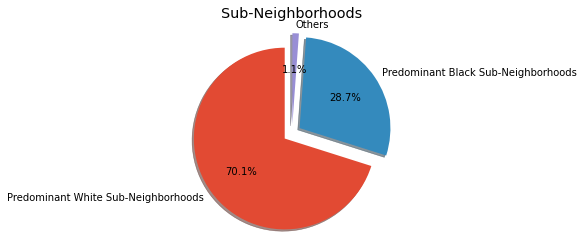

In [312]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'Predominant White Sub-Neighborhoods', 'Predominant Black Sub-Neighborhoods', 'Others'
sizes = [(61/87),(25/87),(1/87)]
# only "explode" the 2nd slice 
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
plt.title("Sub-Neighborhoods")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
##############################################################
# WBUR and Neighborhoods Analysis: 
##############################################################

In [16]:
# Working with the WBUR data set 
# Aggregating all the five years articles 

data1 = pd.read_csv("wbur2018.csv")
data2 = pd.read_csv("wbur2017.csv")
data3 = pd.read_csv("wbur2016.csv")
data4 = pd.read_csv("wbur2015.csv")
data5 = pd.read_csv("wbur2014.csv")

data_frame = pd.concat([data1,data2,data3,data4,data5], ignore_index=True)
data_frame

,Unnamed: 0,text
0,0,A Massachusetts pharmacist convicted for his r...
1,1,On this morning we find almost the entire stat...
2,2,If you're making outdoor plans in Greater Bost...
3,3,A lack of independent testing laboratories is ...
4,4,The big nor'easter continues to spin out in th...
...,...,...
12651,3972,Showers are in the forecast for the next sever...
12652,3973,Iraqi helicopter gunships struck suspected ins...
12653,3974,Massachusetts Gov. Deval Patrick is urging the...
12654,3975,As warm and very humid air attempts to move no...


In [19]:
# Cleaning the data set 

# Special characters 
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "\xc2", "\xa0",
             "\x80", "\x9c", "\x99", "\x94", "\xad", "\xe2", "\x9d"]

# Removing Special characters 
for char in spec_chars:
    data_frame['text'] = data_frame['text'].str.replace(char, ' ')

# Lowercase all the words
data_frame['text'] = data_frame['text'].apply(lambda x: x.lower())



In [ ]:
# Implementation on Neighborhoods 
# ----------------------------------------------------------

In [26]:
# Finding the neighborhoods that were mentioned 
# This is done for the white neighborhoods
# ----------------------------------------------
data_arr = data_frame['text']
# -------------------------------------
wn_df = pd.DataFrame(columns =['Subs'])
wn_df['Subs'] = w_neighborhoods
# -------------------------------------

mentions=[]
for neighborhood in wn_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue
    mentions.append(count)

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[62, 106, 235, 79, 86, 229, 144, 265, 8, 105, 6, 21, 37, 56, 205, 9, 100, 9, 56]
Count    1818
dtype: int64


In [27]:
# Printing the list of white neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([wn_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection

,Subs,Count
0,Allston,62
1,Back Bay,106
2,Beacon Hill,235
3,Brighton,79
4,Charlestown,86
5,Downtown,229
6,East Boston,144
7,Fenway,265
8,Harbor Islands,8
9,Jamaica Plain,105


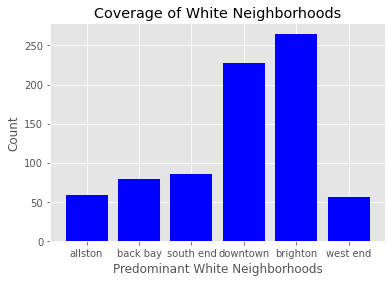

In [346]:
# This will be done using tableau (Has to be changed)
# -------------------------------------------------------
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = ['allston', 'back bay','south end','downtown','brighton','west end']

mentions = [59,79, 86, 227,265, 56]

white_neighborhood = [i for i, _ in enumerate(x)]

plt.bar(white_neighborhood, mentions, color='blue')
plt.xlabel("Predominant White Neighborhoods")
plt.ylabel("Count")
plt.title("Coverage of White Neighborhoods")

plt.xticks(white_neighborhood, x)

plt.show()

In [29]:
# This is done for the Black neighborhoods
# ----------------------------------------------
bn_df = pd.DataFrame(columns =['Subs'])
bn_df['Subs'] = b_neighborhoods
# ----------------------------------------------

mentions=[]
for neighborhood in bn_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue
    mentions.append(count)
    
mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[380, 62, 116, 291]
Count    849
dtype: int64


In [30]:
# Printing the list of black neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([bn_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection


,Subs,Count
0,Dorchester,380
1,Hyde Park,62
2,Mattapan,116
3,Roxbury,291


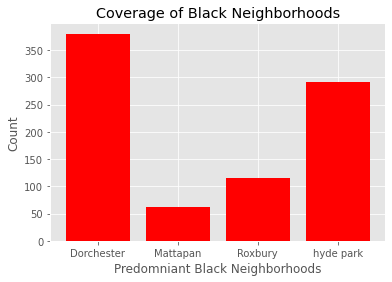

In [24]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = ['Dorchester', 'Mattapan', 'Roxbury', 'hyde park']
mentions = [380,62,116,291]

Black_neighborhood = [i for i, _ in enumerate(x)]

plt.bar(Black_neighborhood, mentions, color='red')
plt.xlabel("Predomniant Black Neighborhoods")
plt.ylabel("Count")
plt.title("Coverage of Black Neighborhoods")

plt.xticks(Black_neighborhood , x)

plt.show()

In [492]:
# Implementation on Sub Neighborhoods 
# ----------------------------------------------------------

In [32]:
# white sub-neighborhoods mentioned
ws_df = pd.DataFrame(columns =['Subs'])
ws_df['Subs'] = w_subneighborhoods
# ------------------------------------

mentions=[]
for neighborhood in ws_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue 
    mentions.append(count)
    
mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[1, 0, 62, 0, 0, 106, 0, 2, 1, 6781, 79, 0, 17, 0, 0, 0, 86, 0, 0, 1, 0, 59, 0, 0, 16, 2, 144, 2, 0, 0, 2, 0, 0, 0, 0, 0, 105, 2, 1, 1, 0, 0, 21, 0, 2, 3, 56, 56, 289, 0, 45, 9, 205, 100, 0, 1, 1, 0, 0, 9, 0]
Count    8267
dtype: int64


In [33]:
# Printing the list of white sub neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([ws_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection


,Subs,Count
0,Aberdeen,1
2,Allston,62
5,Back Bay,106
7,Bay Village,2
8,Bellevue Hill,1
9,Boston,6781
10,Brighton,79
12,Bunker Hill,17
16,Charlestown,86
19,City Point,1


In [34]:
# Black sub-neighborhoods mentioned
s_df = pd.DataFrame(columns =['Subs'])
s_df['Subs'] = b_subneighborhoods
# -------------------------------

mentions=[]
for neighborhood in s_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
    mentions.append(count)
    

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mention.sum())

Count    878
dtype: int64


In [35]:
# Printing the list of black sub neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([s_df,mention],axis=1)
selection = new_df.loc[new_df['Count']!=0]
selection

,Subs,Count
1,Codman Square,7
3,Dorchester,380
7,Georgetown,12
8,Grove Hall,8
9,Hyde Park,62
10,Lower Roxbury,1
11,Mattapan,116
12,Meeting House Hill,1
15,Roxbury,291


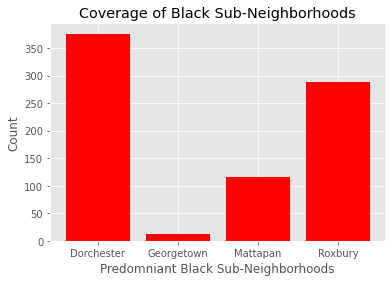

In [36]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = ['Dorchester', 'Georgetown', 'Mattapan', 'Roxbury']
mentions = [376, 12, 116, 289]

Black_sub_neighborhood = [i for i, _ in enumerate(x)]

plt.bar(Black_sub_neighborhood, mentions, color='red')
plt.xlabel("Predomniant Black Sub-Neighborhoods")
plt.ylabel("Count")
plt.title("Coverage of Black Sub-Neighborhoods")

plt.xticks(Black_neighborhood , x)

plt.show()

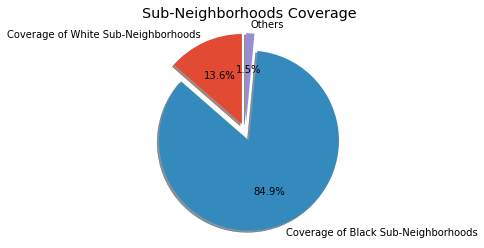

In [37]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'Coverage of White Sub-Neighborhoods', 'Coverage of Black Sub-Neighborhoods', 'Others'
sizes = [(1089/8018),(6809/8018),(120/8018)]
# only "explode" the 2nd slice 
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
plt.title("Sub-Neighborhoods Coverage")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

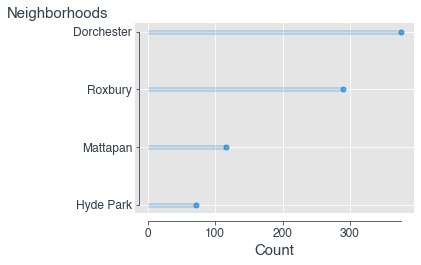

In [38]:
# Another option for bar graph ??
# -------------------------------
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
percentages = pd.Series([376, 116, 289, 71], 
                        index=['Dorchester', 'Mattapan', 'Roxbury', 'Hyde Park'])
df = pd.DataFrame({'Count' : percentages})
df = df.sort_values(by='Count')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['Count'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['Count'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Count', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.9, 'Neighborhoods', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

In [ ]:
#######################################################################
# Homoicide Coverage 
#######################################################################

In [41]:
homoicide_df = pd.read_csv('Homicide List Boston 2014-2018.csv')
homoicide_df.head()

,First Name,Last Name,Year,Race,Gender,Age,Unnamed: 6
0,Clayborn,Blair,2018,B,M,58,NaN
1,Alexander,Allen,2018,B,M,55,NaN
2,Darryl,Nobles,2018,B,M,53,NaN
3,Karim,Blount,2018,B,M,42,NaN
4,Joao,Alves,2018,B,M,42,NaN


In [42]:
a = homoicide_df.groupby("Year")
homoicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   First Name  255 non-null    object 
 1   Last Name   255 non-null    object 
 2   Year        255 non-null    int64  
 3   Race        255 non-null    object 
 4   Gender      252 non-null    object 
 5   Age         255 non-null    int64  
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.1+ KB


In [43]:
f_name = homoicide_df['First Name']
l_name = homoicide_df['Last Name']
f_name = f_name.str.lower()
l_name = l_name.str.lower()

f_df = pd.DataFrame(columns =['First Name'])
l_df = pd.DataFrame(columns =['Last Name'])
f_df['First Name'] = f_name
l_df['Last Name'] = l_name

In [44]:
mentions=[]
for i,j in zip(f_df['First Name'],l_df['Last Name']):
    count = 0
    for article in data_arr: 
        if i in article.split() and j in article.split():
            count += 1
    mentions.append(count)
    

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mention.sum())

Count    456
dtype: int64


In [45]:
new_df = pd.concat([homoicide_df,mention],axis=1)
selection = new_df.loc[new_df['Count']!=0]
selection

,First Name,Last Name,Year,Race,Gender,Age,Unnamed: 6,Count
0,Clayborn,Blair,2018,B,M,58,NaN,5
1,Alexander,Allen,2018,B,M,55,NaN,3
6,Deondra,Lee,2018,B,M,36,NaN,2
8,Anthony,Young,2018,B,M,33,NaN,24
9,Steven,Wilson,2018,B,M,33,NaN,7
...,...,...,...,...,...,...,...,...
244,Adrian,Gonzalez,2014,W H,M,17,NaN,4
248,Edward,Lawn,2014,W N,M,68,NaN,1
249,Sean,Dwyer,2014,W N,M,29,NaN,1
252,Janmarcos,Pena,2014,WH,M,9,NaN,2


In [55]:
new_df.pivot_table(index='Race',values='Count', aggfunc=np.sum)

,Count
Race,
A,0
A B,10
B,285
B H,2
B N,87
B N H,0
C B,0
CV,0
H,11


In [56]:
new_df.pivot_table(index='Gender',values='Count', aggfunc=np.sum)

,Count
Gender,
F,24
H,0
M,431
M,1


In [57]:
new_df.pivot_table(index='Age',values='Count', aggfunc=np.sum)

,Count
Age,
3,1
4,0
6,0
9,2
15,3
16,0
17,6
18,30
19,2
